In [3]:
# !pip install geodatasets

In [44]:
import os
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
os.chdir('..')
os.getcwd()

'/Users/rujalshrestha/Projects/mac-migration/gisc-412/nepal-wildfire'

In [10]:
df = gpd.read_file('data/Fire/DL_FIRE_M-C61_660433/fire_archive_M-C61_660433.shp')

In [11]:
df.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE,geometry
0,27.5921,87.5385,306.2,1.1,1.1,2000-11-01,0500,Terra,MODIS,55,6.03,292.1,6.2,D,0,POINT (87.5385 27.5921)
1,29.1006,81.9170,330.6,1.3,1.1,2000-11-06,0518,Terra,MODIS,87,6.03,293.7,43.0,D,0,POINT (81.917 29.1006)
2,30.0881,81.3358,308.7,1.8,1.3,2000-11-07,0601,Terra,MODIS,58,6.03,291.2,21.1,D,0,POINT (81.3358 30.0881)
3,30.0841,81.3570,306.0,1.9,1.3,2000-11-07,0601,Terra,MODIS,37,6.03,287.4,17.1,D,0,POINT (81.357 30.0841)
4,30.1060,81.9647,315.0,2.1,1.4,2000-11-08,0506,Terra,MODIS,64,6.03,282.6,41.6,D,0,POINT (81.9647 30.106)


In [12]:
df['datetime'] = pd.to_datetime(
  df["ACQ_DATE"].astype(str) + " " + df['ACQ_TIME'].astype(str).str.zfill(4),
  format='%Y-%m-%d %H%M'
).drop(
  columns=["ACQ_DATE", "ACQ_TIME", "INSTRUMENT"]
)

df.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE,geometry,datetime
0,27.5921,87.5385,306.2,1.1,1.1,2000-11-01,0500,Terra,MODIS,55,6.03,292.1,6.2,D,0,POINT (87.5385 27.5921),2000-11-01 05:00:00
1,29.1006,81.9170,330.6,1.3,1.1,2000-11-06,0518,Terra,MODIS,87,6.03,293.7,43.0,D,0,POINT (81.917 29.1006),2000-11-06 05:18:00
2,30.0881,81.3358,308.7,1.8,1.3,2000-11-07,0601,Terra,MODIS,58,6.03,291.2,21.1,D,0,POINT (81.3358 30.0881),2000-11-07 06:01:00
3,30.0841,81.3570,306.0,1.9,1.3,2000-11-07,0601,Terra,MODIS,37,6.03,287.4,17.1,D,0,POINT (81.357 30.0841),2000-11-07 06:01:00
4,30.1060,81.9647,315.0,2.1,1.4,2000-11-08,0506,Terra,MODIS,64,6.03,282.6,41.6,D,0,POINT (81.9647 30.106),2000-11-08 05:06:00


In [31]:
df.sort_values('datetime', ascending=True)

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE,geometry,datetime
0,27.5921,87.5385,306.2,1.1,1.1,2000-11-01,0500,Terra,MODIS,55,6.03,292.1,6.2,D,0,POINT (87.5385 27.5921),2000-11-01 05:00:00
1,29.1006,81.9170,330.6,1.3,1.1,2000-11-06,0518,Terra,MODIS,87,6.03,293.7,43.0,D,0,POINT (81.917 29.1006),2000-11-06 05:18:00
2,30.0881,81.3358,308.7,1.8,1.3,2000-11-07,0601,Terra,MODIS,58,6.03,291.2,21.1,D,0,POINT (81.3358 30.0881),2000-11-07 06:01:00
3,30.0841,81.3570,306.0,1.9,1.3,2000-11-07,0601,Terra,MODIS,37,6.03,287.4,17.1,D,0,POINT (81.357 30.0841),2000-11-07 06:01:00
4,30.1060,81.9647,315.0,2.1,1.4,2000-11-08,0506,Terra,MODIS,64,6.03,282.6,41.6,D,0,POINT (81.9647 30.106),2000-11-08 05:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79048,29.3110,81.8124,323.8,2.4,1.5,2025-06-14,0926,Aqua,MODIS,25,61.03,295.1,42.8,D,0,POINT (81.8124 29.311),2025-06-14 09:26:00
79049,29.9688,81.3453,326.7,1.0,1.0,2025-06-21,0904,Aqua,MODIS,75,61.03,304.7,18.3,D,0,POINT (81.3453 29.9688),2025-06-21 09:04:00
79050,29.9674,81.3348,318.2,1.0,1.0,2025-06-21,0904,Aqua,MODIS,43,61.03,299.4,8.8,D,0,POINT (81.3348 29.9674),2025-06-21 09:04:00
79051,27.4277,85.0329,312.3,1.1,1.0,2025-06-24,0403,Terra,MODIS,57,61.03,293.7,6.6,D,0,POINT (85.0329 27.4277),2025-06-24 04:03:00


In [32]:
wildfires = df[df['datetime'].between('2000-11-01', pd.Timestamp.today())]

In [33]:
states_full = gpd.read_file('data/gadm41_NPL.gpkg', layer='ADM_ADM_3')

In [34]:
states_full.head()

,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,NPL.1.1.1_1,NPL,Nepal,NPL.1_1,Central,मध्यमाञ्चल विकास क्षेत्र,NPL.1.1_1,Bagmati,NA,Bhaktapur,Bhadgaon| Khwopa|Bhaktapur Jilla,NA,Jilla,District,NA,NP.MM.BK,"MULTIPOLYGON (((85.4064 27.63235, 85.3987 27.6..."
1,NPL.1.1.2_1,NPL,Nepal,NPL.1_1,Central,मध्यमाञ्चल विकास क्षेत्र,NPL.1.1_1,Bagmati,NA,Dhading,NA,NA,Jilla,District,NA,NP.MM.DH,"MULTIPOLYGON (((84.90819 27.69722, 84.9026 27...."
2,NPL.1.1.3_1,NPL,Nepal,NPL.1_1,Central,मध्यमाञ्चल विकास क्षेत्र,NPL.1.1_1,Bagmati,NA,Kathmandu,KTM,NA,Jilla,District,NA,NP.MM.KT,"MULTIPOLYGON (((85.28735 27.58574, 85.28586 27..."
3,NPL.1.1.4_1,NPL,Nepal,NPL.1_1,Central,मध्यमाञ्चल विकास क्षेत्र,NPL.1.1_1,Bagmati,NA,Kavrepalanchok,"Kavrepalanchowk, Kavreplanchok",NA,Jilla,District,NA,NP.MM.KV,"MULTIPOLYGON (((85.69758 27.36454, 85.69907 27..."
4,NPL.1.1.5_1,NPL,Nepal,NPL.1_1,Central,मध्यमाञ्चल विकास क्षेत्र,NPL.1.1_1,Bagmati,NA,Lalitpur,Patan,NA,Jilla,District,NA,NP.MM.LL,"MULTIPOLYGON (((85.41771 27.43488, 85.41286 27..."


In [35]:
states = states_full.drop(columns=['GID_0', 'COUNTRY', 'CC_3', 'NL_NAME_1', 'NL_NAME_2', 'NL_NAME_3', 'VARNAME_3', 'TYPE_3']).rename(columns={
    'GID_1': 'PROVINCE_CODE',
    'GID_2': 'DISTRICT_CODE',
    'GID_3': 'STATE_CODE',
    'NAME_1': 'PROVINCE_NAME',
    'NAME_2': 'DISTRICT_NAME',
    'NAME_3': 'STATE_NAME',
    'ENGTYPE_3': 'TYPE',
    'HASC_3': 'SUBDIVISION_CODE',
})

states.head()

,STATE_CODE,PROVINCE_CODE,PROVINCE_NAME,DISTRICT_CODE,DISTRICT_NAME,STATE_NAME,TYPE,SUBDIVISION_CODE,geometry
0,NPL.1.1.1_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Bhaktapur,District,NP.MM.BK,"MULTIPOLYGON (((85.4064 27.63235, 85.3987 27.6..."
1,NPL.1.1.2_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Dhading,District,NP.MM.DH,"MULTIPOLYGON (((84.90819 27.69722, 84.9026 27...."
2,NPL.1.1.3_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Kathmandu,District,NP.MM.KT,"MULTIPOLYGON (((85.28735 27.58574, 85.28586 27..."
3,NPL.1.1.4_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Kavrepalanchok,District,NP.MM.KV,"MULTIPOLYGON (((85.69758 27.36454, 85.69907 27..."
4,NPL.1.1.5_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Lalitpur,District,NP.MM.LL,"MULTIPOLYGON (((85.41771 27.43488, 85.41286 27..."


In [36]:
states.crs == wildfires.crs

True

In [37]:
fire_with_state = gpd.sjoin(wildfires, states, how='left', predicate='within')

In [38]:
fire_with_state.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,...,datetime,index_right,STATE_CODE,PROVINCE_CODE,PROVINCE_NAME,DISTRICT_CODE,DISTRICT_NAME,STATE_NAME,TYPE_right,SUBDIVISION_CODE
0,27.5921,87.5385,306.2,1.1,1.1,2000-11-01,0500,Terra,MODIS,55,...,2000-11-01 05:00:00,28.0,NPL.2.2.4_1,NPL.2_1,East,NPL.2.2_1,Mechi,Taplejung,District,NP.PW.TP
1,29.1006,81.9170,330.6,1.3,1.1,2000-11-06,0518,Terra,MODIS,87,...,2000-11-06 05:18:00,52.0,NPL.4.2.4_1,NPL.4_1,Mid-Western,NPL.4.2_1,Karnali,Kalikot,District,NP.MP.KK
2,30.0881,81.3358,308.7,1.8,1.3,2000-11-07,0601,Terra,MODIS,58,...,2000-11-07 06:01:00,50.0,NPL.4.2.2_1,NPL.4_1,Mid-Western,NPL.4.2_1,Karnali,Humla,District,NP.MP.HU
3,30.0841,81.3570,306.0,1.9,1.3,2000-11-07,0601,Terra,MODIS,37,...,2000-11-07 06:01:00,50.0,NPL.4.2.2_1,NPL.4_1,Mid-Western,NPL.4.2_1,Karnali,Humla,District,NP.MP.HU
4,30.1060,81.9647,315.0,2.1,1.4,2000-11-08,0506,Terra,MODIS,64,...,2000-11-08 05:06:00,50.0,NPL.4.2.2_1,NPL.4_1,Mid-Western,NPL.4.2_1,Karnali,Humla,District,NP.MP.HU


In [39]:
states.columns

Index(['STATE_CODE', 'PROVINCE_CODE', 'PROVINCE_NAME', 'DISTRICT_CODE',
       'DISTRICT_NAME', 'STATE_NAME', 'TYPE', 'SUBDIVISION_CODE', 'geometry'],
      dtype='object')

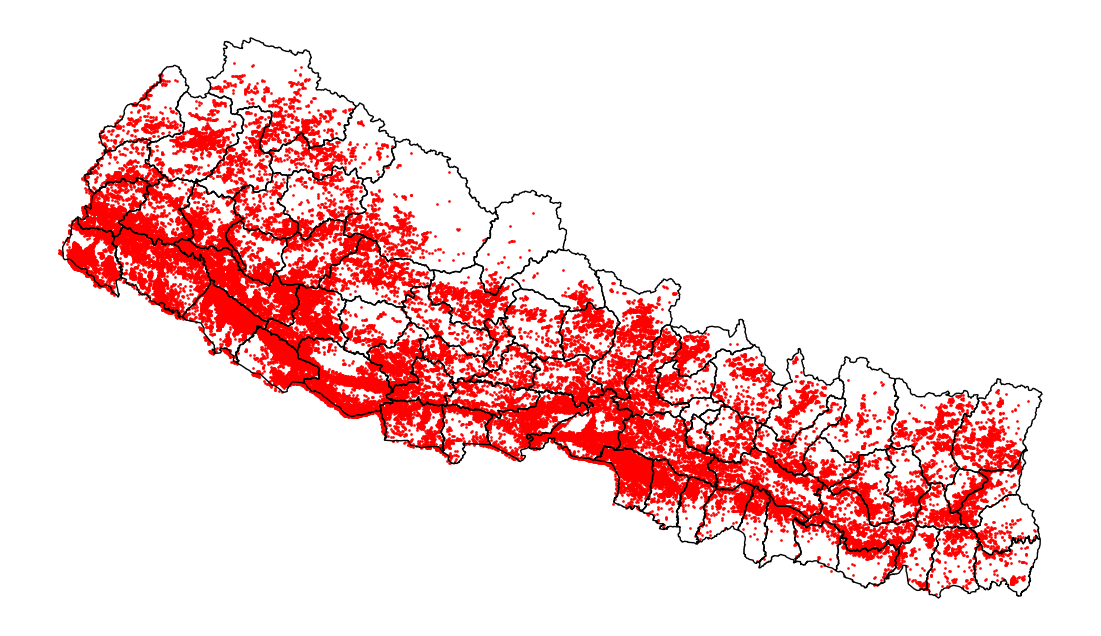

In [40]:
fig, ax = plt.subplots(figsize=(15, 8))

states.boundary.plot(ax = ax, color='black', linewidth=1)
wildfires.plot(ax = ax, color = 'red', markersize=1, alpha=0.9)


ax.set_axis_off()

plt.show()

In [41]:
fire_counts = (
  fire_with_state.groupby('STATE_CODE').
  size()
  .reset_index(name='FIRE_COUNT')
)

print(len(fire_counts))

fire_counts.head()

75


,STATE_CODE,FIRE_COUNT
0,NPL.1.1.1_1,6
1,NPL.1.1.2_1,1027
2,NPL.1.1.3_1,24
3,NPL.1.1.4_1,415
4,NPL.1.1.5_1,108


In [42]:
states_fire = states.merge(fire_counts, on='STATE_CODE', how='left')

states_fire.head()

,STATE_CODE,PROVINCE_CODE,PROVINCE_NAME,DISTRICT_CODE,DISTRICT_NAME,STATE_NAME,TYPE,SUBDIVISION_CODE,geometry,FIRE_COUNT
0,NPL.1.1.1_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Bhaktapur,District,NP.MM.BK,"MULTIPOLYGON (((85.4064 27.63235, 85.3987 27.6...",6
1,NPL.1.1.2_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Dhading,District,NP.MM.DH,"MULTIPOLYGON (((84.90819 27.69722, 84.9026 27....",1027
2,NPL.1.1.3_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Kathmandu,District,NP.MM.KT,"MULTIPOLYGON (((85.28735 27.58574, 85.28586 27...",24
3,NPL.1.1.4_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Kavrepalanchok,District,NP.MM.KV,"MULTIPOLYGON (((85.69758 27.36454, 85.69907 27...",415
4,NPL.1.1.5_1,NPL.1_1,Central,NPL.1.1_1,Bagmati,Lalitpur,District,NP.MM.LL,"MULTIPOLYGON (((85.41771 27.43488, 85.41286 27...",108


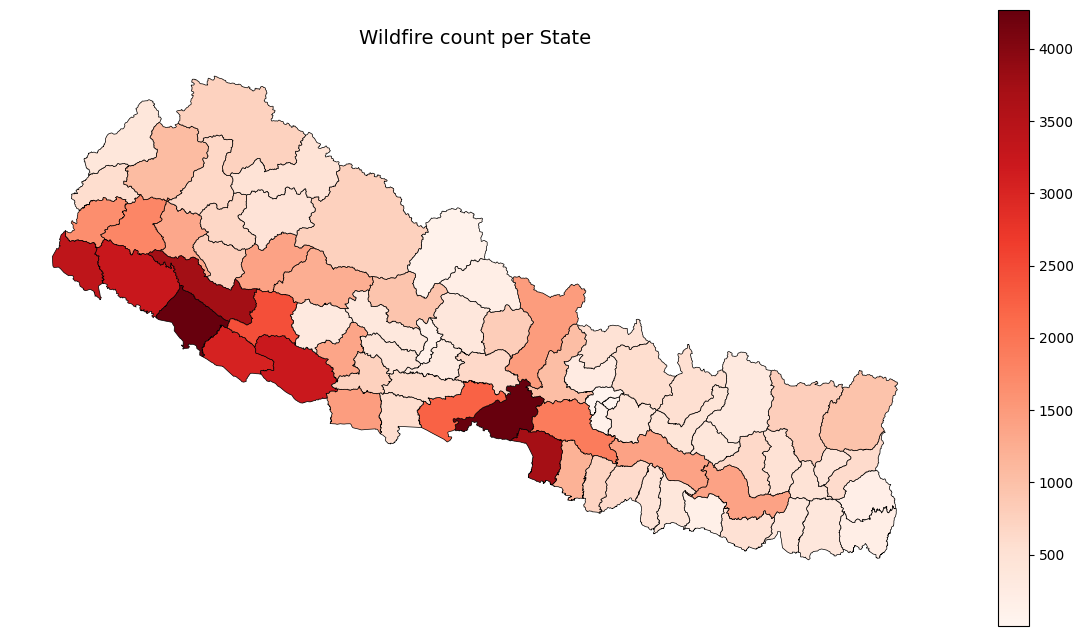

In [43]:
fig, ax = plt.subplots(figsize=(15, 8))

states_fire.plot(
  column='FIRE_COUNT',
  ax = ax,
  cmap='Reds',
  legend=True,
  edgecolor='black',
  linewidth=0.5
)

ax.set_axis_off()

plt.title('Wildfire count per State', fontsize=14)

plt.show()

# KDE plot

In [48]:
x = df.geometry.x
y = df.geometry.y

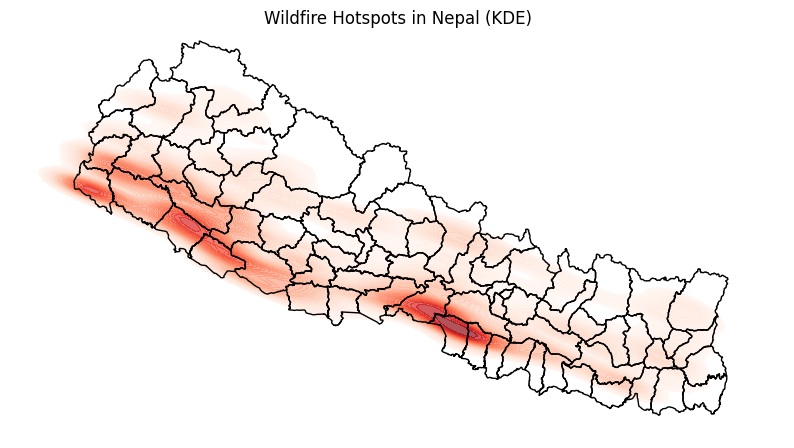

In [64]:
fig, ax = plt.subplots(figsize=(10,8))

sns.kdeplot(
  x=x, y=y,
  cmap='Reds',
  fill=True,
  bw_adjust=0.8,
  levels=50,
  alpha=0.7,
  ax=ax
)

states.boundary.plot(ax=ax, color='black', linewidth=1)

ax.set_axis_off()
ax.set_title('Wildfire Hotspots in Nepal (KDE)')

plt.show()